In [1]:
# Programme information and data loading

print("Dunhumby Carboload Data Cleaning Script")
print("Your raw data file must be called dh_carboload raw_data.csv")
print("Your raw data file must in the same directory as this Jupyter Notebook")


Dunhumby Carboload Data Cleaning Script
Your raw data file must be called dh_carboload raw_data.csv
Your raw data file must in the same directory as this Jupyter Notebook


### In DB Browser:

1. Download the Dunnhumby carboload .csv files

2. Write an SQL query:

"CREATE TABLE Joined_data AS
SELECT
*
FROM
dh_product_lookup pl
JOIN
dh_transactions tr
on
pl.upc=tr.upc;"

3. extract and save a .csv file containing relevant category data "dh_carboload raw_data.csv"

In [2]:
# Import packages and set styles

import pandas as pd
import numpy as np


In [3]:
# Load_data

def load_data():
    try:
        data = pd.read_csv(file_path)
        print("\nData loaded successfully!")
        return data
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

file_path = ("dh_carboload raw_data.csv")

data = load_data()



Data loaded successfully!


In [4]:
# Inspect the data

display(data.head())
data.info()
data.describe(include="all").round(0)


,upc,product_description,commodity,brand,product_size,upc:1,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ,111112360,4.99,1,2130,1,23,221275,22,487026,156,0
1,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ,111112360,5.59,1,2116,1,13,197660,182,330724,90,0
2,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ,111112360,5.79,1,905,1,66,202892,69,2030713,458,0
3,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ,111112360,5.79,1,1026,1,69,313690,201,2117875,477,0
4,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ,111112360,5.79,1,1033,1,80,197886,19,2539040,559,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197681 entries, 0 to 5197680
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   upc                  int64  
 1   product_description  object 
 2   commodity            object 
 3   brand                object 
 4   product_size         object 
 5   upc:1                int64  
 6   dollar_sales         float64
 7   units                int64  
 8   time_of_transaction  int64  
 9   geography            int64  
 10  week                 int64  
 11  household            int64  
 12  store                int64  
 13  basket               int64  
 14  day                  int64  
 15  coupon               int64  
dtypes: float64(1), int64(11), object(4)
memory usage: 634.5+ MB


,upc,product_description,commodity,brand,product_size,upc:1,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
count,5.197681e+06,5197681,5197681,5197681,5154085,5.197681e+06,5197681.0,5197681.0,5197681.0,5197681.0,5197681.0,5197681.0,5197681.0,5197681.0,5197681.0,5197681.0
unique,NaN,872,4,131,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,PRIVATE LABEL THIN SPAGHETTI,pasta,Private Label,16 OZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,173093,2327944,1502556,1436562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.203548e+09,NaN,NaN,NaN,NaN,6.203548e+09,2.0,1.0,1544.0,1.0,53.0,223138.0,202.0,1662961.0,370.0,0.0
std,3.152023e+09,NaN,NaN,NaN,NaN,3.152023e+09,1.0,1.0,385.0,0.0,30.0,141216.0,112.0,959319.0,210.0,0.0
min,1.111124e+08,NaN,NaN,NaN,NaN,1.111124e+08,-12.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
25%,3.620000e+09,NaN,NaN,NaN,NaN,3.620000e+09,1.0,1.0,1258.0,1.0,27.0,99053.0,105.0,829906.0,185.0,0.0
50%,5.100013e+09,NaN,NaN,NaN,NaN,5.100013e+09,2.0,1.0,1602.0,1.0,55.0,209694.0,209.0,1666884.0,380.0,0.0
75%,9.999982e+09,NaN,NaN,NaN,NaN,9.999982e+09,2.0,1.0,1825.0,2.0,79.0,339568.0,300.0,2496495.0,551.0,0.0


In [5]:
# Check for duplicates and missing values

print("Initial duplicate entries:", data.duplicated().sum())
missing_values = data.isnull().sum()
print("\nInitial missing values:\n")
print(missing_values[missing_values > 0])


Initial duplicate entries: 0

Initial missing values:

product_size    43596
dtype: int64


In [6]:
# Provide frequency counts for each categorical column

for column in data.select_dtypes(include='object').columns:
    print(f"\n{column} value counts:")
    print(data[column].value_counts())



product_description value counts:
product_description
PRIVATE LABEL THIN SPAGHETTI           173093
PRIVATE LABEL SPAGHETTI REGULAR        171884
PRIVATE LABEL ELBOW MACARONI            99065
PRIVATE LABEL ANGEL HAIR PASTA          79920
RAGU TRADITIONAL PLAIN                  79305
                                        ...  
LOG CABIN MAPLE PANCAKE/WAFFLE              1
M C ARRIBIATA SAUCE 26 OZ                   1
MRS BUTTERWORTH\LT SYRUP                    1
EDDIE DVEG CONFETTI PASTA                   1
PRIVATE LABEL TRADITIONAL SPAGHETTI         1
Name: count, Length: 872, dtype: int64

commodity value counts:
commodity
pasta            2327944
pasta sauce      1913522
syrups            685918
pancake mixes     270297
Name: count, dtype: int64

brand value counts:
brand
Private Label            1502556
Ragu                      738294
Barilla                   388135
Prego                     342971
Private Label Premium     229686
                          ...   
Eden          

In [7]:
# EXTRACT PERIOD FEATURES

def extract_period_features_from_integers(df, column_name):
    # Check column existence
    if column_name not in df.columns:
        print(f"Column {column_name} does not exist in DataFrame.")
        return df

    # Define the length of each period
    days_in_week = 7
    days_in_four_week = 28
    days_in_quarter = 91  # Approximation, can vary if precise calculation is needed
    days_in_year = 365  # Adjust for leap years if needed

    # Calculate the offset to start the first complete period at the end of the data
    total_days = df[column_name].max()
    offset_week = (total_days % days_in_week)
    offset_four_week = (total_days % days_in_four_week)
    offset_quarter = (total_days % days_in_quarter)
    offset_year = (total_days % days_in_year)

    # Adjust calculation to ensure periods start at 1 and there is no period 0
    
    df['Week'] = ((data[column_name] - 1 + offset_week) // days_in_week) + 1
    df['FourWeek'] = ((data[column_name] - 1 + offset_four_week) // days_in_four_week) + 1
    df['Quarter'] = ((data[column_name] - 1 + offset_quarter) // days_in_quarter) + 1
    df['Year'] = ((data[column_name] - 1 + offset_year) // days_in_year) + 1
    return df

column_to_use = 'day'
data = extract_period_features_from_integers(data, column_to_use)
display(data.head())


,upc,product_description,commodity,brand,product_size,upc:1,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,Week,FourWeek,Quarter,Year
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ,111112360,4.99,1,2130,1,23,221275,22,487026,156,0,23,6,2,2
1,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ,111112360,5.59,1,2116,1,13,197660,182,330724,90,0,13,4,1,2
2,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ,111112360,5.79,1,905,1,66,202892,69,2030713,458,0,66,17,6,3
3,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ,111112360,5.79,1,1026,1,69,313690,201,2117875,477,0,69,18,6,3
4,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ,111112360,5.79,1,1033,1,80,197886,19,2539040,559,0,80,20,7,3


In [8]:
# IMPLEMENT CLEANING DECISIONS 

data_cleaned = data.copy()
data_cleaned.fillna('MISSING')
for col in data_cleaned.select_dtypes(include=['object']).columns:
    data_cleaned[col] = data_cleaned[col].str.strip()

data_cleaned.drop(columns=['time_of_transaction', 'geography', 'store', 'coupon','upc:1'], inplace=True)
data_cleaned = data_cleaned[data_cleaned['dollar_sales'] >= 0] 

dh_pasta = data_cleaned[data_cleaned['commodity'] == 'pasta']
dh_pasta_sauce = data_cleaned[data_cleaned['commodity'] == 'pasta sauce']
dh_syrups = data_cleaned[data_cleaned['commodity'] == 'syrups']
dh_pancake_mixes = data_cleaned[data_cleaned['commodity'] == 'pancake mixes']
        

In [9]:
dh_pasta.to_csv('dh_pasta.csv', index=False)
dh_pasta_sauce.to_csv('dh_pasta_sauce.csv', index=False)
dh_syrups.to_csv('dh_syrups.csv', index=False)
dh_pancake_mixes.to_csv('dh_pancake_mixes.csv', index=False)

In [10]:
# Import selected file - change the filename as needed

input_file_name = 'dh_pasta.csv'
df = pd.read_csv(input_file_name)
df

,upc,product_description,commodity,brand,product_size,dollar_sales,units,week,household,basket,day,Week,FourWeek,Quarter,Year
0,789312112,ELENAS QTRO A/H PSTA W/SC,pasta,Elena's,12 OZ,5.99,1,51,233307,1550880,353,51,13,4,2
1,789316104,ELENAS TRE RNBW LNG PASTA,pasta,Elena's,12 OZ,4.99,1,35,92931,1087146,240,35,9,3,2
2,1140060206,GOOCH SOY ENRCH SPAGH,pasta,Gooch,16 OZ,1.37,1,79,502370,2506480,553,79,20,7,3
3,1140060206,GOOCH SOY ENRCH SPAGH,pasta,Gooch,16 OZ,1.37,1,86,277907,2736870,599,86,22,7,3
4,1140060206,GOOCH SOY ENRCH SPAGH,pasta,Gooch,16 OZ,1.99,1,30,317697,683688,208,30,8,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325317,9999985766,PRIVATE LABEL ITALIAN TRI COLORE CRE,pasta,Private Label Premium,16 OZ,9.95,5,92,459941,2938935,643,92,23,8,3
2325318,9999985766,PRIVATE LABEL ITALIAN TRI COLORE CRE,pasta,Private Label Premium,16 OZ,10.00,5,92,448056,2915450,638,92,23,8,3
2325319,9999985766,PRIVATE LABEL ITALIAN TRI COLORE CRE,pasta,Private Label Premium,16 OZ,10.76,4,69,346396,2138602,482,69,18,6,3
2325320,9999985766,PRIVATE LABEL ITALIAN TRI COLORE CRE,pasta,Private Label Premium,16 OZ,10.76,4,17,225832,389960,116,17,5,2,2


In [11]:
# Explore the data

df.info()
duplicates = df.duplicated().sum()
missing = df.isnull().sum()

print('\nDuplicates',duplicates)
print('\nMissing\n\n',missing)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325322 entries, 0 to 2325321
Data columns (total 15 columns):
 #   Column               Dtype  
---  ------               -----  
 0   upc                  int64  
 1   product_description  object 
 2   commodity            object 
 3   brand                object 
 4   product_size         object 
 5   dollar_sales         float64
 6   units                int64  
 7   week                 int64  
 8   household            int64  
 9   basket               int64  
 10  day                  int64  
 11  Week                 int64  
 12  FourWeek             int64  
 13  Quarter              int64  
 14  Year                 int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 266.1+ MB

Duplicates 0

Missing

 upc                    0
product_description    0
commodity              0
brand                  0
product_size           0
dollar_sales           0
units                  0
week                   0
household          

In [12]:
# Establish the number of category buyers / customers

all_customers = (df['household']).nunique()
print("Total number of unique households buying: ", all_customers)

Total number of unique households buying:  411502


In [13]:
# Obtain raw statistics for quarterly sales and buyer metrics

quarterly_totals = df.groupby('Quarter').agg(
    Total_Num_Customers=('household', 'nunique'),
    Total_Num_Baskets=('basket', 'nunique'),
    Total_Num_Stockcodes=('upc', 'nunique'),
    Total_Quantity=('units', 'sum'),
    Total_Revenue=('dollar_sales', 'sum')
)
display(quarterly_totals)

,Total_Num_Customers,Total_Num_Baskets,Total_Num_Stockcodes,Total_Quantity,Total_Revenue
Quarter,,,,,
1,137404,240167,349,353851,351531.55
2,141822,249890,347,350925,368235.29
3,138101,241644,349,350412,349341.68
4,128278,217567,337,316488,312454.34
5,141987,246161,333,356838,357253.45
6,149299,264182,325,388348,390429.49
7,147216,260395,322,397880,373448.65
8,139204,239957,315,363025,349849.26


In [14]:
# Handle division by zero by replacing 0 with NaN in Total_Quantity
quarterly_totals['Total_Quantity'] = quarterly_totals['Total_Quantity'].replace(0, np.nan)

# Calculate Total_Price
quarterly_totals['Total_Price'] = quarterly_totals['Total_Revenue'] / quarterly_totals['Total_Quantity']

# Display the updated DataFrame with Total_Price
display(quarterly_totals)

,Total_Num_Customers,Total_Num_Baskets,Total_Num_Stockcodes,Total_Quantity,Total_Revenue,Total_Price
Quarter,,,,,,
1,137404,240167,349,353851,351531.55,0.993445
2,141822,249890,347,350925,368235.29,1.049328
3,138101,241644,349,350412,349341.68,0.996946
4,128278,217567,337,316488,312454.34,0.987255
5,141987,246161,333,356838,357253.45,1.001164
6,149299,264182,325,388348,390429.49,1.005360
7,147216,260395,322,397880,373448.65,0.938596
8,139204,239957,315,363025,349849.26,0.963706


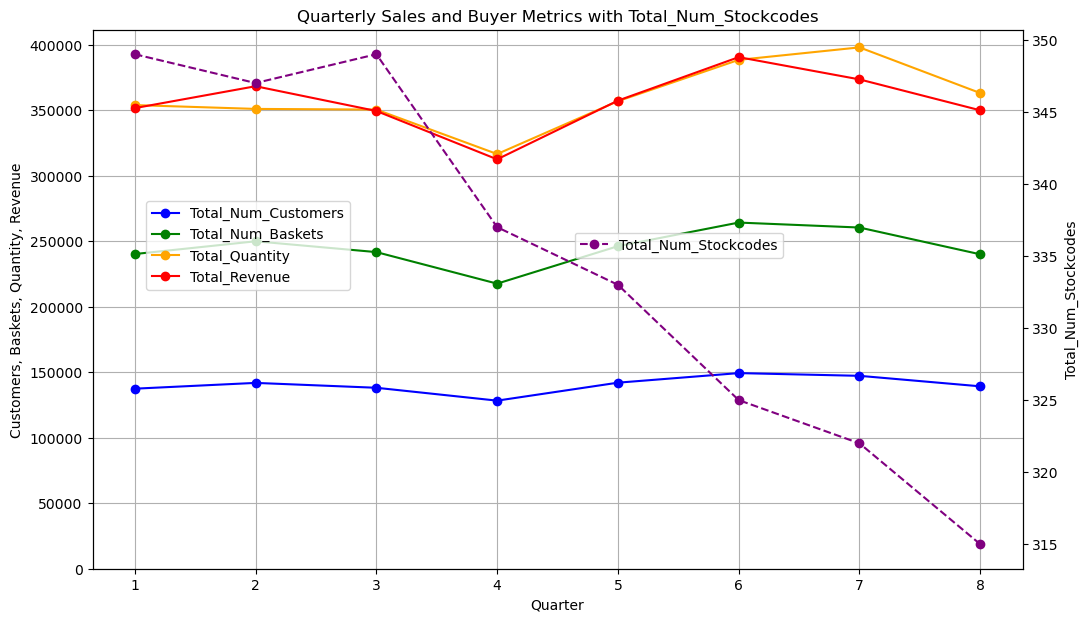

In [17]:
import matplotlib.pyplot as plt

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot Total_Num_Customers, Total_Num_Baskets, Total_Quantity, and Total_Revenue on the primary y-axis
ax1.plot(quarterly_totals.index, quarterly_totals['Total_Num_Customers'], marker='o', label='Total_Num_Customers', color='blue')
ax1.plot(quarterly_totals.index, quarterly_totals['Total_Num_Baskets'], marker='o', label='Total_Num_Baskets', color='green')
ax1.plot(quarterly_totals.index, quarterly_totals['Total_Quantity'], marker='o', label='Total_Quantity', color='orange')
ax1.plot(quarterly_totals.index, quarterly_totals['Total_Revenue'], marker='o', label='Total_Revenue', color='red')

# Label for primary y-axis
ax1.set_ylabel('Customers, Baskets, Quantity, Revenue')
ax1.set_xlabel('Quarter')

# Set quarter numbers as x-ticks
ax1.set_xticks(quarterly_totals.index)

# Add grid
ax1.grid(True)

# Force y-axis to start from 0
ax1.set_ylim(bottom=0)

# Create secondary y-axis to plot Total_Num_Stockcodes
ax2 = ax1.twinx()
ax2.plot(quarterly_totals.index, quarterly_totals['Total_Num_Stockcodes'], marker='o', linestyle='--', label='Total_Num_Stockcodes', color='purple')

# Label for secondary y-axis
ax2.set_ylabel('Total_Num_Stockcodes')

# Add legends in the middle of the chart
ax1.legend(loc='center left', bbox_to_anchor=(0.05, 0.6))
ax2.legend(loc='center right', bbox_to_anchor=(0.75, 0.6))

# Add title
plt.title('Quarterly Sales and Buyer Metrics with Total_Num_Stockcodes')

# Show the plot
plt.show()

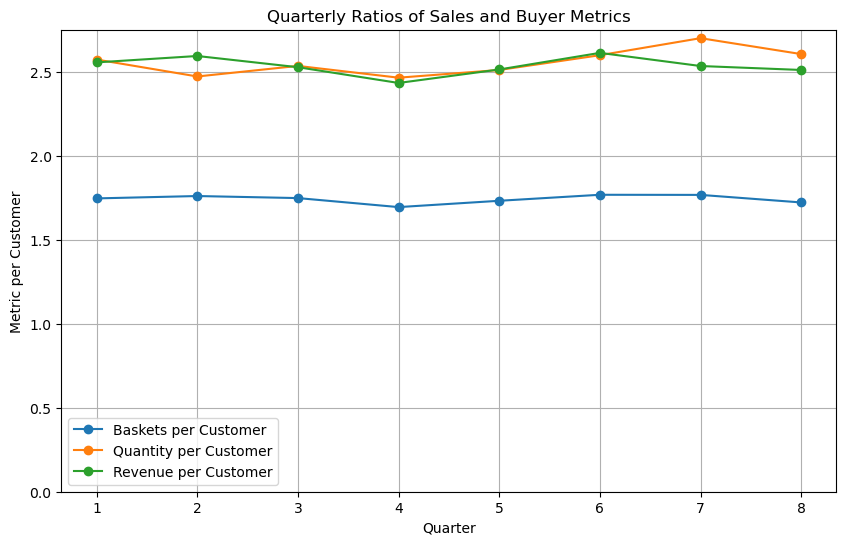

In [18]:
import matplotlib.pyplot as plt

# Assuming quarterly_totals DataFrame has been already calculated and contains data for Quarters 1 to 8

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each ratio
plt.plot(quarterly_totals.index, quarterly_totals['Total_Num_Baskets'] / quarterly_totals['Total_Num_Customers'], marker='o', label='Baskets per Customer')
plt.plot(quarterly_totals.index, quarterly_totals['Total_Quantity'] / quarterly_totals['Total_Num_Customers'], marker='o', label='Quantity per Customer')
plt.plot(quarterly_totals.index, quarterly_totals['Total_Revenue'] / quarterly_totals['Total_Num_Customers'], marker='o', label='Revenue per Customer')

# Add title and labels
plt.title('Quarterly Ratios of Sales and Buyer Metrics')
plt.xlabel('Quarter')
plt.ylabel('Metric per Customer')

# Set quarter numbers as x-ticks
plt.xticks(quarterly_totals.index)

# Add grid
plt.grid(True)

# Ensure y-axis starts from 0
plt.ylim(bottom=0)

# Add legend to differentiate between the lines
plt.legend()

# Show the plot
plt.show()

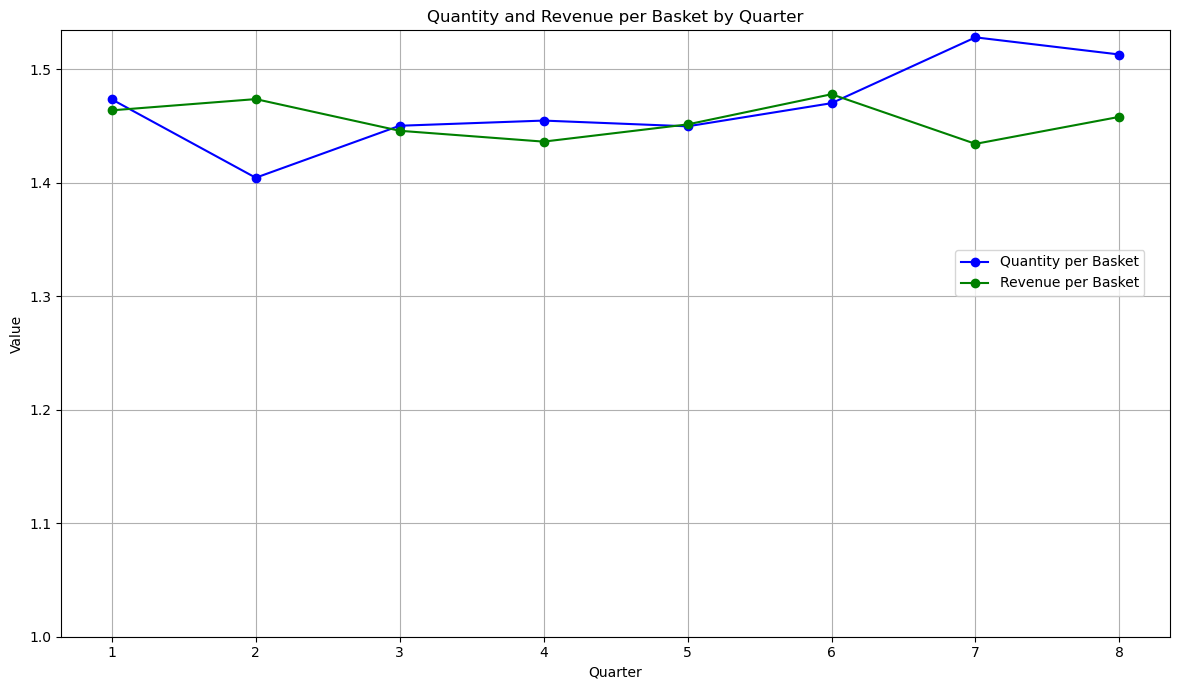

In [20]:
import matplotlib.pyplot as plt

# Calculate the ratios
quarterly_totals['Quantity_per_Basket'] = quarterly_totals['Total_Quantity'] / quarterly_totals['Total_Num_Baskets']
quarterly_totals['Revenue_per_Basket'] = quarterly_totals['Total_Revenue'] / quarterly_totals['Total_Num_Baskets']

# Create the plot
plt.figure(figsize=(12, 7))

# Plot the ratios
plt.plot(quarterly_totals.index, quarterly_totals['Quantity_per_Basket'], marker='o', label='Quantity per Basket', color='blue')
plt.plot(quarterly_totals.index, quarterly_totals['Revenue_per_Basket'], marker='o', label='Revenue per Basket', color='green')

# Add title and labels
plt.title('Quantity and Revenue per Basket by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Value')

# Set quarter numbers as x-ticks
plt.xticks(quarterly_totals.index)

# Add grid
plt.grid(True)
# Ensure y-axis starts from 0
plt.ylim(bottom=1)

# Add legend in the right middle of the plot
plt.legend(loc='center left', bbox_to_anchor=(0.8, 0.6))

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()

In [25]:
# Obtain raw statistics for quarter to quarter repeat buying

# Step 1: Create a dictionary of unique customers per quarter
customers_per_quarter = df.groupby('Quarter')['household'].unique().apply(set).to_dict()

# Ensure the quarters are sorted correctly
sorted_quarters = sorted(customers_per_quarter.keys())

# Step 2: Calculate the repeat buying rate for directly consecutive quarters
repeat_buying_rates = {}

for i in range(1, len(sorted_quarters)):
    current_quarter = sorted_quarters[i]
    previous_quarter = sorted_quarters[i - 1]

    # Calculate intersection (repeat customers) between current and previous quarter
    repeat_customers = customers_per_quarter[current_quarter].intersection(customers_per_quarter[previous_quarter])

    # Calculate repeat rate as a percentage
    if len(customers_per_quarter[previous_quarter]) > 0:  # To avoid division by zero
        repeat_rate = (len(repeat_customers) / len(customers_per_quarter[previous_quarter])) * 100
    else:
        repeat_rate = 0  # If there were no customers in the previous quarter, set repeat rate to 0

    repeat_buying_rates[current_quarter] = repeat_rate

# Convert to DataFrame for easier viewing
repeat_buying_rates_df = pd.DataFrame(list(repeat_buying_rates.items()), columns=['Quarter', 'Repeat Buying Rate (%)'])

repeat_buying_rates_df

,Quarter,Repeat Buying Rate (%)
0,2,53.756805
1,3,52.285964
2,4,49.555760
3,5,53.817490
4,6,54.125378
5,7,53.029156
6,8,50.753994


In [26]:
# Inspect the data

display(repeat_buying_rates_df.head())
repeat_buying_rates_df.info()
repeat_buying_rates_df.describe(include="all").round(0)

,Quarter,Repeat Buying Rate (%)
0,2,53.756805
1,3,52.285964
2,4,49.555760
3,5,53.817490
4,6,54.125378


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Quarter                 7 non-null      int64  
 1   Repeat Buying Rate (%)  7 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 244.0 bytes


,Quarter,Repeat Buying Rate (%)
count,7.0,7.0
mean,5.0,52.0
std,2.0,2.0
min,2.0,50.0
25%,4.0,52.0
50%,5.0,53.0
75%,6.0,54.0
max,8.0,54.0


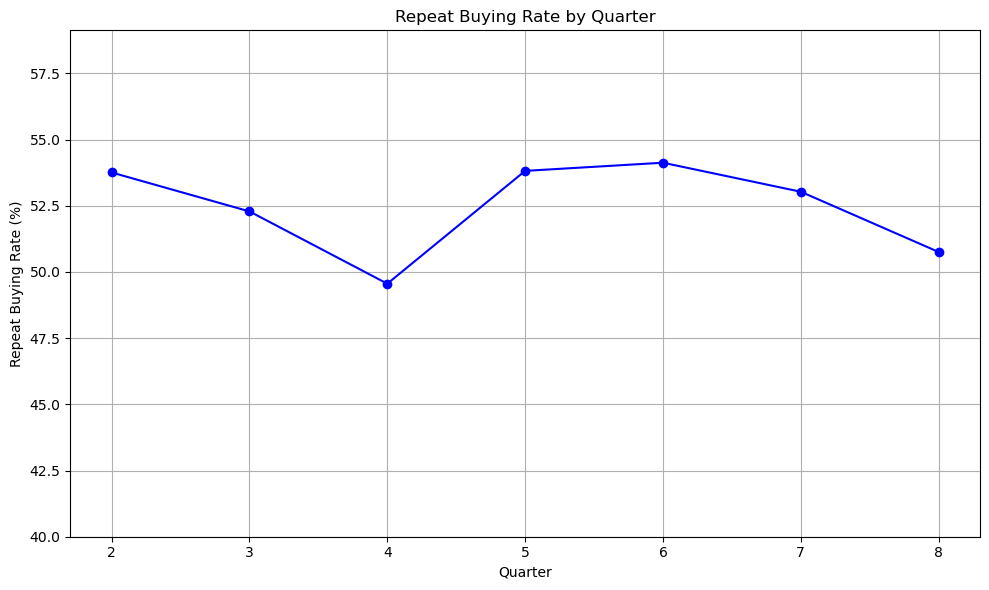

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for demonstration
# repeat_buying_rates_df = pd.DataFrame({
#     'Quarter': [1, 2, 3, 4, 5, 6, 7, 8],
#     'Repeat Buying Rate (%)': [20, 25, 22, 30, 27, 29, 32, 28]
# })

# Ensure the data is sorted by Quarter
repeat_buying_rates_df = repeat_buying_rates_df.sort_values('Quarter')

# Plot the Repeat Buying Rate
plt.figure(figsize=(10, 6))
plt.plot(repeat_buying_rates_df['Quarter'], repeat_buying_rates_df['Repeat Buying Rate (%)'], marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Repeat Buying Rate by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Repeat Buying Rate (%)')
plt.xticks(repeat_buying_rates_df['Quarter'])  # Ensure x-ticks match quarters
plt.grid(True)

# Set y-axis to start from 0 for full visibility
plt.ylim(bottom=40, top=repeat_buying_rates_df['Repeat Buying Rate (%)'].max() + 5)

# Show the plot
plt.tight_layout()
plt.show()

In [35]:
# Obtain disaggregate results (by purchase class) for the most recent quarter

# Select data from the latest quarter only

latestq = df['Quarter'].max()
df_latestq = df[df['Quarter']==latestq]

# Calculate penetration (b) and zero buyers (b0)

total_unique_buyers = df['household'].nunique()
buyers_in_period = df_latestq['household'].nunique()
zero_buyers_in_period = total_unique_buyers - buyers_in_period

# Aggregate transactions into one per customer

customer_stats = df_latestq.groupby('household').agg({
    'basket': 'nunique',
    'dollar_sales': 'sum',
    'units': 'sum',
}).reset_index()
customer_stats.columns = ['Household', 'Purchase_Frequency', 'Total_Revenue', 'Total_Items']


# Aggregate customers in purchase frequency classses with a user specified cutoff
purchase_frequency_cutoff = int(input("Enter purchase frequency cutoff (default is 7): ") or "7")

bins = list(range(0, purchase_frequency_cutoff+1)) + [float('inf')]
labels = [str(x) for x in range(purchase_frequency_cutoff)] + [f'{purchase_frequency_cutoff}+']
customer_stats['Purchase_Class'] = pd.cut(customer_stats['Purchase_Frequency'], bins=bins, right=False, 
    labels=labels)
buyer_class_aggregated = customer_stats.groupby('Purchase_Class').agg({
    'Household': 'nunique',
    'Total_Revenue': 'sum',
    'Total_Items': 'sum'
}).rename(columns={'Household': 'Number_of_Buyers'})

# Adjust for zero buyers
buyer_class_aggregated.loc['0', 'Number_of_Buyers'] += zero_buyers_in_period
buyer_class_aggregated['Percent_Total_Buyers'] = (
    buyer_class_aggregated['Number_of_Buyers'] / buyers_in_period * 100
)
buyer_class_aggregated['Percent_Total_Revenue'] = (
    buyer_class_aggregated['Total_Revenue'] / buyer_class_aggregated['Total_Revenue'].sum() * 100
)           
buyer_class_aggregated.loc['0', 'Percent_Total_Buyers'] = '0'
buyer_class_aggregated = buyer_class_aggregated.apply(pd.to_numeric, errors='coerce').round(0)

display(buyer_class_aggregated)


Enter purchase frequency cutoff (default is 7): 7


,Number_of_Buyers,Total_Revenue,Total_Items,Percent_Total_Buyers,Percent_Total_Revenue
Purchase_Class,,,,,
0,272298,0.0,0,0.0,0.0
1,86025,124416.0,129693,62.0,36.0
2,29270,84726.0,88385,21.0,24.0
3,12515,54829.0,56700,9.0,16.0
4,5745,33804.0,34910,4.0,10.0
5,2741,20285.0,20835,2.0,6.0
6,1359,12046.0,12227,1.0,3.0
7+,1549,19742.0,20275,1.0,6.0


In [36]:
# Examine trends in the distribution of buyers by quarter

# Group transactions by household and quarter
customer_stats = df.groupby(['household', 'Quarter']).agg({
    'basket': 'nunique'
}).reset_index()
customer_stats.columns = ['Household', 'Quarter', 'Purchase_Frequency']

# Apply the purchase frequency classes
purchase_frequency_cutoff = 7  # Adjust as needed
bins = list(range(0, purchase_frequency_cutoff+1)) + [float('inf')]
labels = [str(x) for x in range(purchase_frequency_cutoff)] + [f'{purchase_frequency_cutoff}+']
customer_stats['Purchase_Class'] = pd.cut(customer_stats['Purchase_Frequency'], bins=bins, right=False, labels=labels)

# Group by 'Quarter' and 'Purchase_Class' and count unique households
buyer_class_aggregated = customer_stats.groupby(['Quarter', 'Purchase_Class']).agg({
    'Household': 'nunique'
}).reset_index()

# Rename the columns for clarity
buyer_class_aggregated.columns = ['Quarter', 'Purchase_Class', 'Number_of_Buyers']

# Pivot the data to have purchase classes as rows and quarters as columns, fill missing with 0
pivoted_data = buyer_class_aggregated.pivot(index='Purchase_Class', columns='Quarter', values='Number_of_Buyers')
pivoted_data = pivoted_data.fillna(0).astype(int)

# Calculate zero buyers per quarter and add them to the pivoted DataFrame
total_buyers_per_quarter = pivoted_data.sum()
zero_buyers_per_quarter = all_customers - total_buyers_per_quarter
pivoted_data.loc['0'] = zero_buyers_per_quarter

display (pivoted_data)

Quarter,1,2,3,4,5,6,7,8
Purchase_Class,,,,,,,,
0,274098,269680,273401,283224,269515,262203,264286,272298
1,83277,85351,83742,80180,86666,89686,88256,86025
2,29547,30717,29650,27028,30539,32198,32081,29270
3,12928,13300,12886,11163,13062,14066,13784,12515
4,5889,6219,5932,5089,5958,6572,6547,5745
5,2739,3011,2802,2343,2747,3250,3161,2741
6,1420,1502,1457,1170,1443,1672,1572,1359
7+,1604,1722,1632,1305,1572,1855,1815,1549


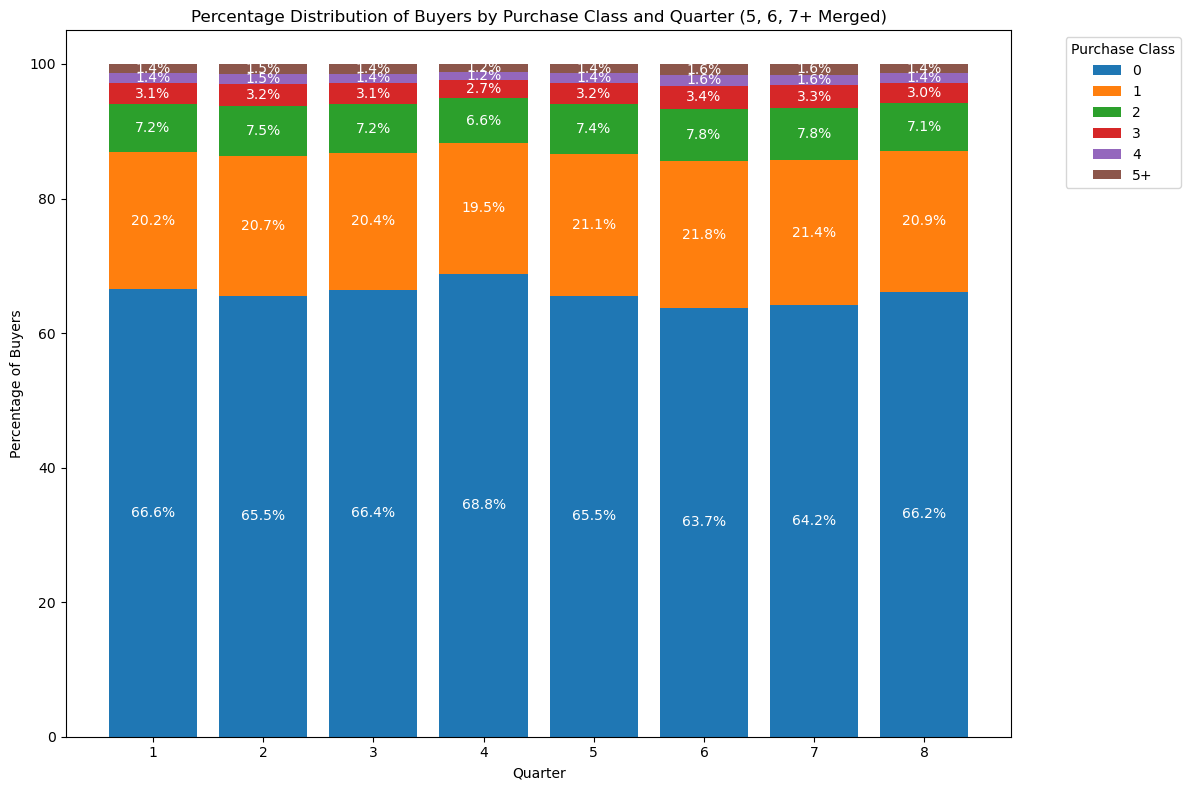

In [37]:
import matplotlib.pyplot as plt

# Merge purchase classes '5', '6', and '7+' into one category '5+'
merged_pivoted_data = pivoted_data.copy()
merged_pivoted_data.loc['5+'] = merged_pivoted_data.loc['5':'7+'].sum()
merged_pivoted_data = merged_pivoted_data.drop(index=['5', '6', '7+'])

# Convert the number of buyers to percentages by dividing by the total buyers for each quarter
merged_pivoted_data_percentage = merged_pivoted_data.div(merged_pivoted_data.sum(axis=0), axis=1) * 100

# Prepare the data for plotting
quarters = merged_pivoted_data_percentage.columns
purchase_classes = merged_pivoted_data_percentage.index

# Create the plot
plt.figure(figsize=(12, 8))

# Initialize bottom for stacking
bottoms = [0] * len(quarters)

# Plot each Purchase_Class as a stacked bar with percentage values
for purchase_class in purchase_classes:
    bar = plt.bar(
        quarters,
        merged_pivoted_data_percentage.loc[purchase_class],
        bottom=bottoms,
        label=purchase_class
    )
    
    # Add percentage labels to the bars
    for rect, percentage in zip(bar, merged_pivoted_data_percentage.loc[purchase_class]):
        height = rect.get_height()
        if height > 0:  # Only label non-zero bars
            plt.text(
                rect.get_x() + rect.get_width() / 2, 
                rect.get_y() + height / 2, 
                f'{percentage:.1f}%', 
                ha='center', va='center', color='white', fontsize=10
            )
    
    # Update bottoms for stacking
    bottoms = [bottom + height for bottom, height in zip(bottoms, merged_pivoted_data_percentage.loc[purchase_class])]

# Add labels and title
plt.title('Percentage Distribution of Buyers by Purchase Class and Quarter (5, 6, 7+ Merged)')
plt.xlabel('Quarter')
plt.ylabel('Percentage of Buyers')
plt.legend(title='Purchase Class', bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove grid lines
plt.grid(False)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for legend
plt.show()

In [38]:
# Filter the data for Brand "Mueller"
df_mueller = df[df['brand'] == 'Mueller']

# Display the filtered dataset (optional)
display(df_mueller)

,upc,product_description,commodity,brand,product_size,dollar_sales,units,week,household,basket,day,Week,FourWeek,Quarter,Year
238096,2920000102,MUELLER SPAGHETTI,pasta,Mueller,8 OZ,0.50,1,98,326722,3125854,686,98,25,8,3
238097,2920000102,MUELLER SPAGHETTI,pasta,Mueller,8 OZ,0.50,1,98,296491,3121457,685,98,25,8,3
238098,2920000102,MUELLER SPAGHETTI,pasta,Mueller,8 OZ,0.59,1,12,33974,305385,80,12,3,1,2
238099,2920000102,MUELLER SPAGHETTI,pasta,Mueller,8 OZ,0.59,1,3,303930,424023,21,3,1,1,2
238100,2920000102,MUELLER SPAGHETTI,pasta,Mueller,8 OZ,0.59,1,39,213375,1196877,271,39,10,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539608,4732530208,ITALIAN MOSTACCIOLI,pasta,Mueller,17.7 OZ,2.38,2,10,326603,848733,70,10,3,1,2
539609,4732530208,ITALIAN MOSTACCIOLI,pasta,Mueller,17.7 OZ,2.38,2,6,205249,465411,37,6,2,1,2
539610,4732530208,ITALIAN MOSTACCIOLI,pasta,Mueller,17.7 OZ,2.38,3,3,350727,418857,19,3,1,1,2
539611,4732530208,ITALIAN MOSTACCIOLI,pasta,Mueller,17.7 OZ,2.38,4,3,355423,425573,21,3,1,1,2


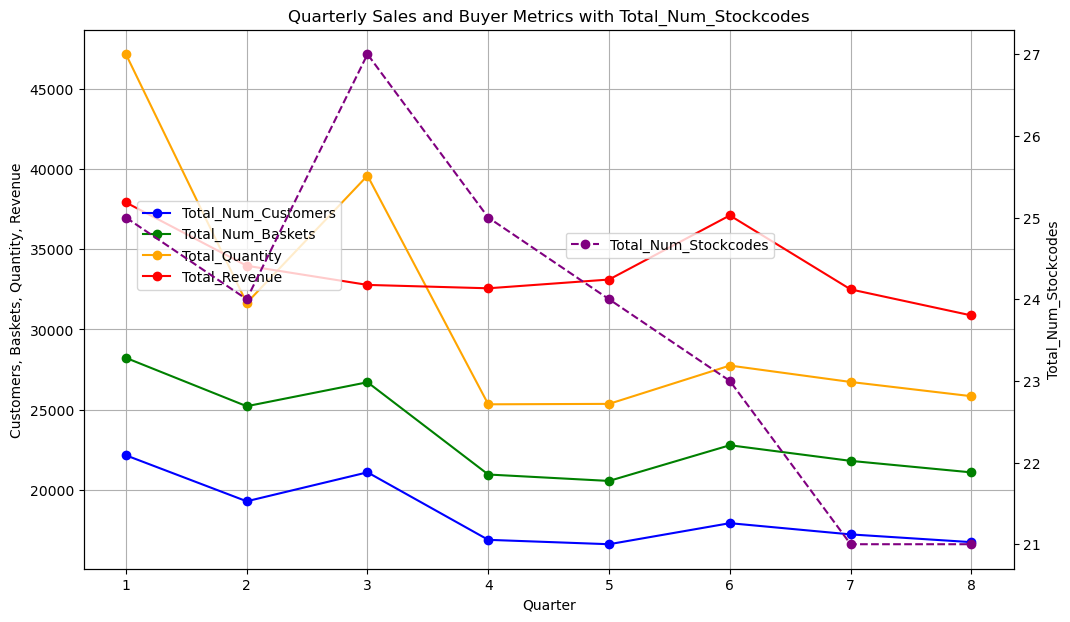

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Group the data by 'Quarter' and calculate the metrics
quarterly_totals = df_mueller.groupby('Quarter').agg(
    Total_Num_Customers=('household', 'nunique'),
    Total_Num_Baskets=('basket', 'nunique'),
    Total_Num_Stockcodes=('upc', 'nunique'),
    Total_Quantity=('units', 'sum'),
    Total_Revenue=('dollar_sales', 'sum')
).reset_index()

# Set 'Quarter' as the index for plotting
quarterly_totals.set_index('Quarter', inplace=True)

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot Total_Num_Customers, Total_Num_Baskets, Total_Quantity, and Total_Revenue on the primary y-axis
ax1.plot(quarterly_totals.index, quarterly_totals['Total_Num_Customers'], marker='o', label='Total_Num_Customers', color='blue')
ax1.plot(quarterly_totals.index, quarterly_totals['Total_Num_Baskets'], marker='o', label='Total_Num_Baskets', color='green')
ax1.plot(quarterly_totals.index, quarterly_totals['Total_Quantity'], marker='o', label='Total_Quantity', color='orange')
ax1.plot(quarterly_totals.index, quarterly_totals['Total_Revenue'], marker='o', label='Total_Revenue', color='red')

# Label for primary y-axis
ax1.set_ylabel('Customers, Baskets, Quantity, Revenue')
ax1.set_xlabel('Quarter')

# Set quarter numbers as x-ticks
ax1.set_xticks(quarterly_totals.index)

# Add grid
ax1.grid(True)

# Create secondary y-axis to plot Total_Num_Stockcodes
ax2 = ax1.twinx()
ax2.plot(quarterly_totals.index, quarterly_totals['Total_Num_Stockcodes'], marker='o', linestyle='--', label='Total_Num_Stockcodes', color='purple')

# Label for secondary y-axis
ax2.set_ylabel('Total_Num_Stockcodes')

# Add legends in the middle of the chart
ax1.legend(loc='center left', bbox_to_anchor=(0.05, 0.6))
ax2.legend(loc='center right', bbox_to_anchor=(0.75, 0.6))

# Add title
plt.title('Quarterly Sales and Buyer Metrics with Total_Num_Stockcodes')

# Show the plot
plt.show()

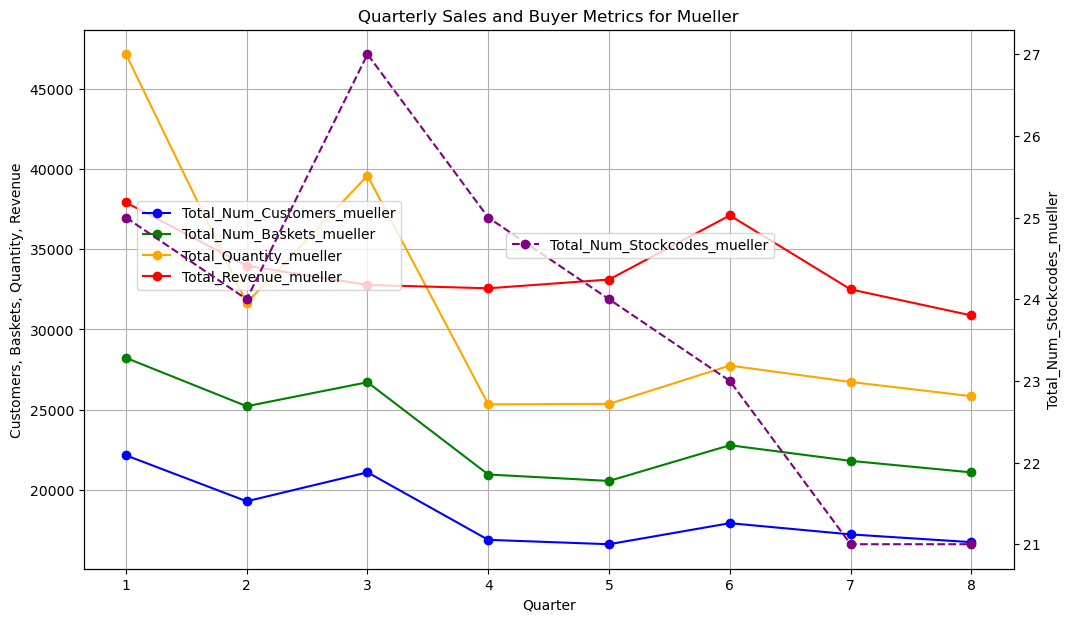

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Group the data by 'Quarter' and calculate the metrics with new names
quarterly_totals = df_mueller.groupby('Quarter').agg(
    Total_Num_Customers_mueller=('household', 'nunique'),
    Total_Num_Baskets_mueller=('basket', 'nunique'),
    Total_Num_Stockcodes_mueller=('upc', 'nunique'),
    Total_Quantity_mueller=('units', 'sum'),
    Total_Revenue_mueller=('dollar_sales', 'sum')
).reset_index()

# Set 'Quarter' as the index for plotting
quarterly_totals.set_index('Quarter', inplace=True)

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot Total_Num_Customers_mueller, Total_Num_Baskets_mueller, Total_Quantity_mueller, and Total_Revenue_mueller on the primary y-axis
ax1.plot(quarterly_totals.index, quarterly_totals['Total_Num_Customers_mueller'], marker='o', label='Total_Num_Customers_mueller', color='blue')
ax1.plot(quarterly_totals.index, quarterly_totals['Total_Num_Baskets_mueller'], marker='o', label='Total_Num_Baskets_mueller', color='green')
ax1.plot(quarterly_totals.index, quarterly_totals['Total_Quantity_mueller'], marker='o', label='Total_Quantity_mueller', color='orange')
ax1.plot(quarterly_totals.index, quarterly_totals['Total_Revenue_mueller'], marker='o', label='Total_Revenue_mueller', color='red')

# Label for primary y-axis
ax1.set_ylabel('Customers, Baskets, Quantity, Revenue')
ax1.set_xlabel('Quarter')

# Set quarter numbers as x-ticks
ax1.set_xticks(quarterly_totals.index)

# Add grid
ax1.grid(True)

# Create secondary y-axis to plot Total_Num_Stockcodes_mueller
ax2 = ax1.twinx()
ax2.plot(quarterly_totals.index, quarterly_totals['Total_Num_Stockcodes_mueller'], marker='o', linestyle='--', label='Total_Num_Stockcodes_mueller', color='purple')

# Label for secondary y-axis
ax2.set_ylabel('Total_Num_Stockcodes_mueller')

# Add legends in the middle of the chart
ax1.legend(loc='center left', bbox_to_anchor=(0.05, 0.6))
ax2.legend(loc='center right', bbox_to_anchor=(0.75, 0.6))

# Add title
plt.title('Quarterly Sales and Buyer Metrics for Mueller')

# Show the plot
plt.show()

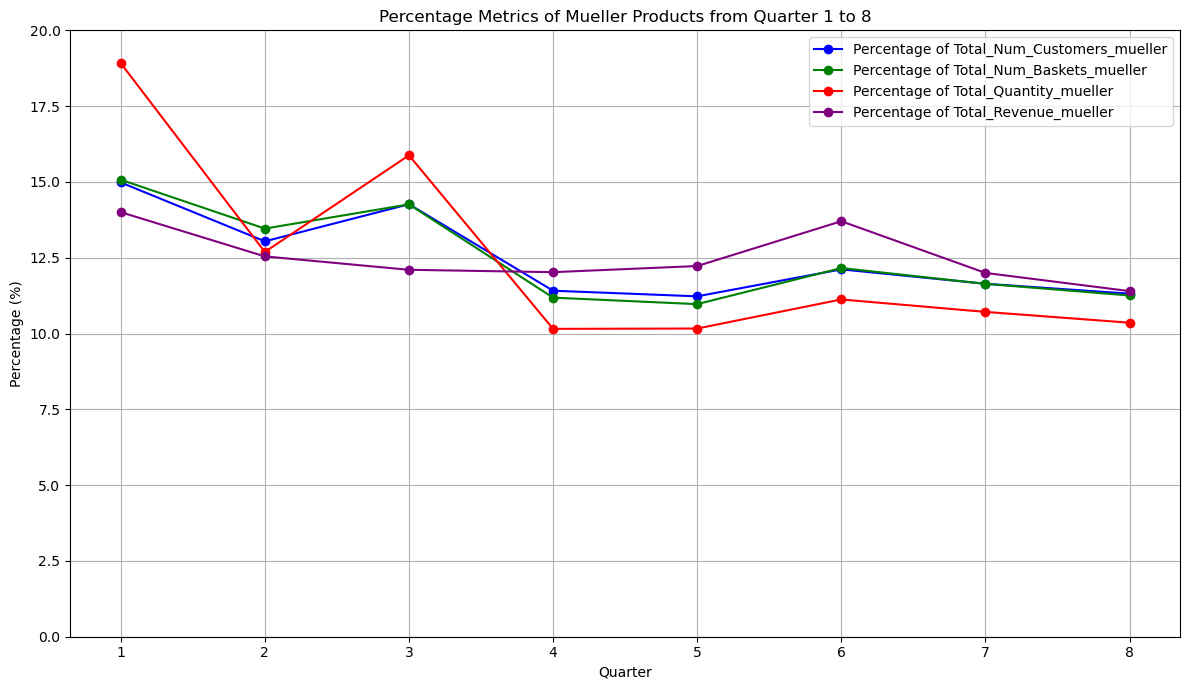

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Group the data by 'Quarter' and calculate the metrics with new names
quarterly_totals = df_mueller.groupby('Quarter').agg(
    Total_Num_Customers_mueller=('household', 'nunique'),
    Total_Num_Baskets_mueller=('basket', 'nunique'),
    Total_Num_Stockcodes_mueller=('upc', 'nunique'),
    Total_Quantity_mueller=('units', 'sum'),
    Total_Revenue_mueller=('dollar_sales', 'sum')
).reset_index()

# Set 'Quarter' as the index for plotting
quarterly_totals.set_index('Quarter', inplace=True)

# Calculate total values for percentage calculation
total_values = {
    'Total_Num_Customers': quarterly_totals['Total_Num_Customers_mueller'].sum(),
    'Total_Num_Baskets': quarterly_totals['Total_Num_Baskets_mueller'].sum(),
    'Total_Num_Stockcodes': quarterly_totals['Total_Num_Stockcodes_mueller'].sum(),
    'Total_Quantity': quarterly_totals['Total_Quantity_mueller'].sum(),
    'Total_Revenue': quarterly_totals['Total_Revenue_mueller'].sum()
}

# Calculate percentages
percentage_df = pd.DataFrame({
    'Percentage_Customers': quarterly_totals['Total_Num_Customers_mueller'] / total_values['Total_Num_Customers'] * 100,
    'Percentage_Baskets': quarterly_totals['Total_Num_Baskets_mueller'] / total_values['Total_Num_Baskets'] * 100,
    'Percentage_Stockcodes': quarterly_totals['Total_Num_Stockcodes_mueller'] / total_values['Total_Num_Stockcodes'] * 100,
    'Percentage_Quantity': quarterly_totals['Total_Quantity_mueller'] / total_values['Total_Quantity'] * 100,
    'Percentage_Revenue': quarterly_totals['Total_Revenue_mueller'] / total_values['Total_Revenue'] * 100
})

# Create a single plot for all percentage metrics
plt.figure(figsize=(12, 7))

# Plot each percentage metric with curves
plt.plot(percentage_df.index, percentage_df['Percentage_Customers'], marker='o', label='Percentage of Total_Num_Customers_mueller', color='blue')
plt.plot(percentage_df.index, percentage_df['Percentage_Baskets'], marker='o', label='Percentage of Total_Num_Baskets_mueller', color='green')

plt.plot(percentage_df.index, percentage_df['Percentage_Quantity'], marker='o', label='Percentage of Total_Quantity_mueller', color='red')
plt.plot(percentage_df.index, percentage_df['Percentage_Revenue'], marker='o', label='Percentage of Total_Revenue_mueller', color='purple')

# Labeling the plot
plt.title('Percentage Metrics of Mueller Products from Quarter 1 to 8')
plt.xlabel('Quarter')
plt.ylabel('Percentage (%)')
plt.xticks(percentage_df.index)  # Set quarter numbers as x-ticks
plt.ylim(0, 20)  # Set y-axis limits to 0% to 20%
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

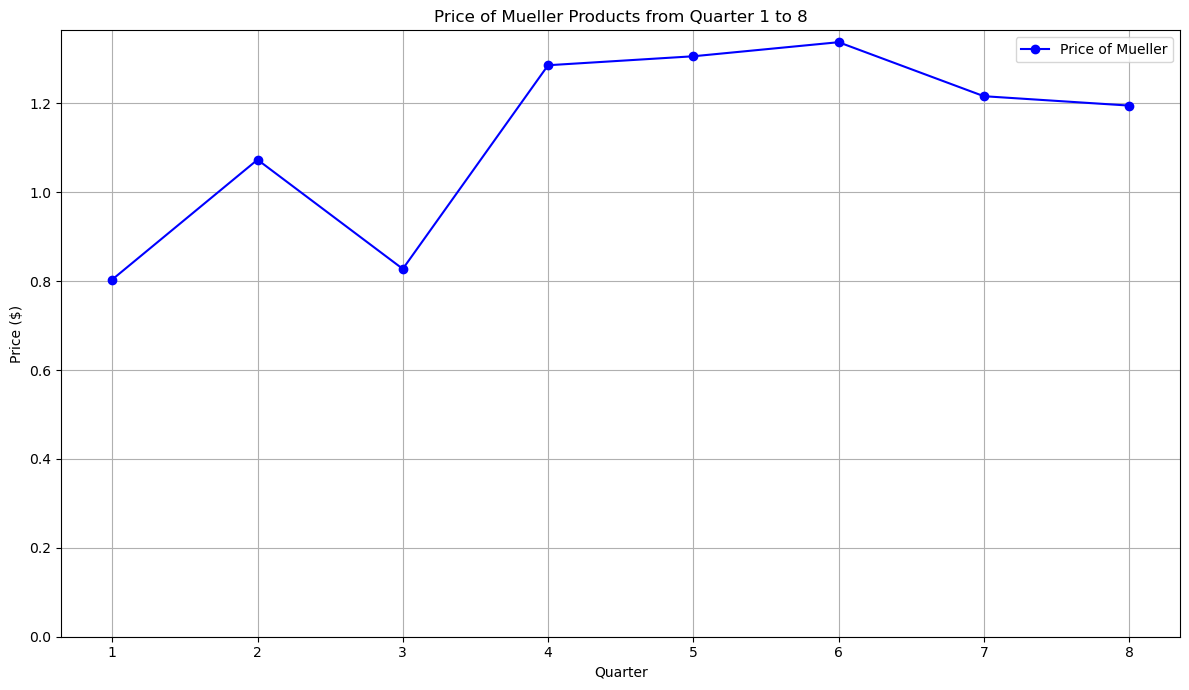

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Group the data by 'Quarter' and calculate the metrics with new names
quarterly_totals = df_mueller.groupby('Quarter').agg(
    Total_Num_Customers_mueller=('household', 'nunique'),
    Total_Num_Baskets_mueller=('basket', 'nunique'),
    Total_Num_Stockcodes_mueller=('upc', 'nunique'),
    Total_Quantity_mueller=('units', 'sum'),
    Total_Revenue_mueller=('dollar_sales', 'sum')
).reset_index()

# Calculate price
quarterly_totals['Price'] = quarterly_totals['Total_Revenue_mueller'] / quarterly_totals['Total_Quantity_mueller']

# Set 'Quarter' as the index for plotting
quarterly_totals.set_index('Quarter', inplace=True)

# Create a single plot for all percentage metrics
plt.figure(figsize=(12, 7))

# Plot each percentage metric with curves
plt.plot(quarterly_totals.index, quarterly_totals['Price'], marker='o', label='Price of Mueller', color='blue')

# Labeling the plot
plt.title('Price of Mueller Products from Quarter 1 to 8')
plt.xlabel('Quarter')
plt.ylabel('Price ($)')
plt.xticks(quarterly_totals.index)  # Set quarter numbers as x-ticks
plt.grid(True)

# Ensure y-axis starts from 0
plt.ylim(bottom=0)

plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

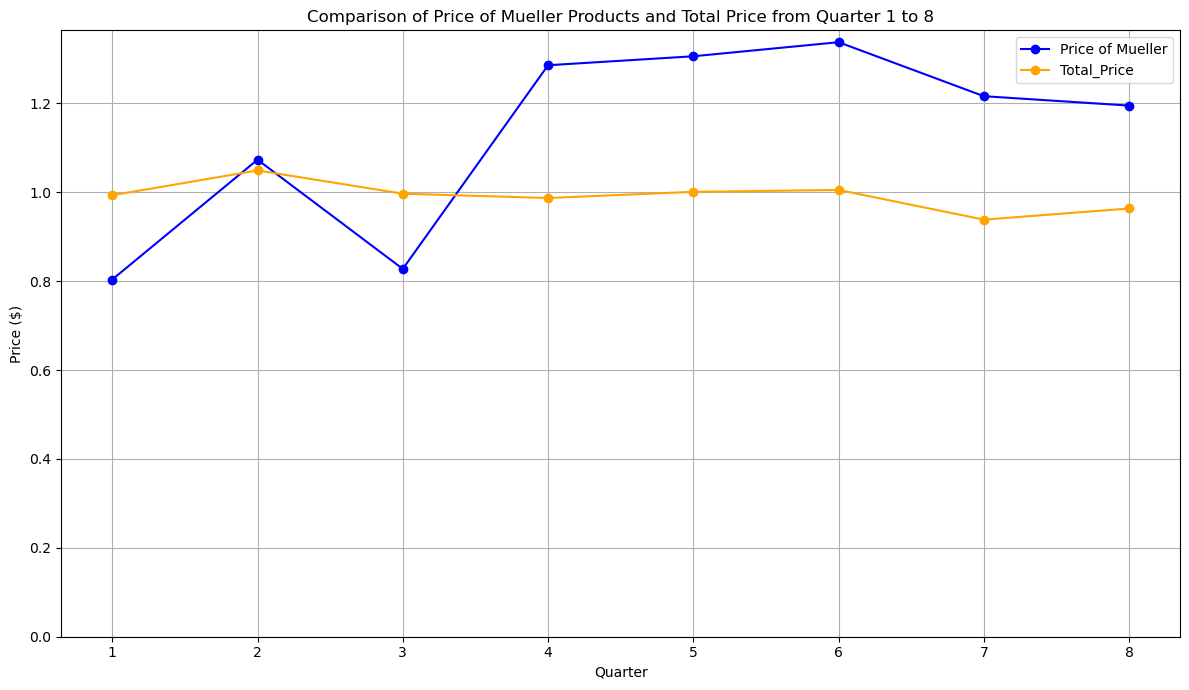

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your original DataFrame for Total_Price calculation
# Group the data by 'Quarter' and calculate the metrics for Mueller
quarterly_totals_mueller = df_mueller.groupby('Quarter').agg(
    Total_Num_Customers_mueller=('household', 'nunique'),
    Total_Num_Baskets_mueller=('basket', 'nunique'),
    Total_Num_Stockcodes_mueller=('upc', 'nunique'),
    Total_Quantity_mueller=('units', 'sum'),
    Total_Revenue_mueller=('dollar_sales', 'sum')
).reset_index()

# Calculate Price for Mueller products
quarterly_totals_mueller['Price'] = quarterly_totals_mueller['Total_Revenue_mueller'] / quarterly_totals_mueller['Total_Quantity_mueller']

# Assuming you have a separate quarterly_totals DataFrame with Total_Price
# Group the data by 'Quarter' and calculate the Total_Price
quarterly_totals = df.groupby('Quarter').agg(
    Total_Num_Customers=('household', 'nunique'),
    Total_Num_Baskets=('basket', 'nunique'),
    Total_Num_Stockcodes=('upc', 'nunique'),
    Total_Quantity=('units', 'sum'),
    Total_Revenue=('dollar_sales', 'sum')
).reset_index()

# Handle division by zero by replacing 0 with NaN in Total_Quantity
quarterly_totals['Total_Quantity'] = quarterly_totals['Total_Quantity'].replace(0, pd.NA)

# Calculate Total_Price
quarterly_totals['Total_Price'] = quarterly_totals['Total_Revenue'] / quarterly_totals['Total_Quantity']

# Set 'Quarter' as the index for both DataFrames
quarterly_totals.set_index('Quarter', inplace=True)
quarterly_totals_mueller.set_index('Quarter', inplace=True)

# Create a single plot for Price and Total_Price
plt.figure(figsize=(12, 7))

# Plot Price for Mueller products
plt.plot(quarterly_totals_mueller.index, quarterly_totals_mueller['Price'], marker='o', label='Price of Mueller', color='blue')

# Plot Total_Price from the first quarterly_totals
plt.plot(quarterly_totals.index, quarterly_totals['Total_Price'], marker='o', label='Total_Price', color='orange')

# Labeling the plot
plt.title('Comparison of Price of Mueller Products and Total Price from Quarter 1 to 8')
plt.xlabel('Quarter')
plt.ylabel('Price ($)')
plt.xticks(quarterly_totals.index)  # Set quarter numbers as x-ticks
plt.grid(True)

# Ensure y-axis starts from 0
plt.ylim(bottom=0)

plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [38]:
df_mueller

,upc,product_description,commodity,brand,product_size,dollar_sales,units,week,household,basket,day,Week,FourWeek,Quarter,Year
238096,2920000102,MUELLER SPAGHETTI,pasta,Mueller,8 OZ,0.50,1,98,326722,3125854,686,98,25,8,3
238097,2920000102,MUELLER SPAGHETTI,pasta,Mueller,8 OZ,0.50,1,98,296491,3121457,685,98,25,8,3
238098,2920000102,MUELLER SPAGHETTI,pasta,Mueller,8 OZ,0.59,1,12,33974,305385,80,12,3,1,2
238099,2920000102,MUELLER SPAGHETTI,pasta,Mueller,8 OZ,0.59,1,3,303930,424023,21,3,1,1,2
238100,2920000102,MUELLER SPAGHETTI,pasta,Mueller,8 OZ,0.59,1,39,213375,1196877,271,39,10,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539608,4732530208,ITALIAN MOSTACCIOLI,pasta,Mueller,17.7 OZ,2.38,2,10,326603,848733,70,10,3,1,2
539609,4732530208,ITALIAN MOSTACCIOLI,pasta,Mueller,17.7 OZ,2.38,2,6,205249,465411,37,6,2,1,2
539610,4732530208,ITALIAN MOSTACCIOLI,pasta,Mueller,17.7 OZ,2.38,3,3,350727,418857,19,3,1,1,2
539611,4732530208,ITALIAN MOSTACCIOLI,pasta,Mueller,17.7 OZ,2.38,4,3,355423,425573,21,3,1,1,2


Quarter,1,2,3,4,5,6,7,8
Purchase_Class,,,,,,,,
0,0,0,0,0,0,0,0,0
1,17898,15364,17238,14072,13917,14646,14208,13842
2,3079,2691,2759,1985,1924,2263,2075,2016
3,767,767,674,521,465,645,568,532
4,235,253,243,177,158,214,205,201
5,93,102,90,59,71,70,66,62
6,37,52,47,27,24,32,37,32
7+,31,41,27,22,30,33,43,34


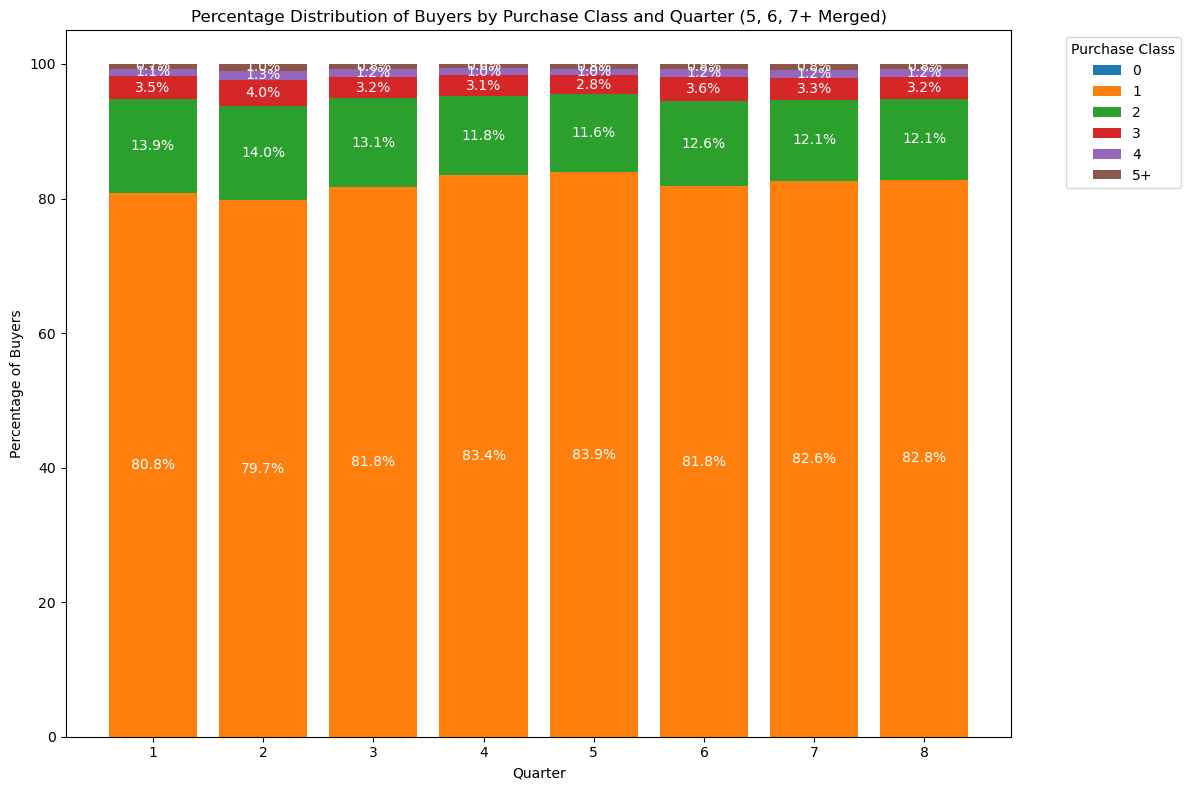

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Group transactions by household and quarter
customer_stats = df_mueller.groupby(['household', 'Quarter']).agg({
    'basket': 'nunique'
}).reset_index()
customer_stats.columns = ['Household', 'Quarter', 'Purchase_Frequency']

# Apply the purchase frequency classes
purchase_frequency_cutoff = 7  # Adjust as needed
bins = list(range(0, purchase_frequency_cutoff + 1)) + [float('inf')]
labels = [str(x) for x in range(purchase_frequency_cutoff)] + [f'{purchase_frequency_cutoff}+']
customer_stats['Purchase_Class'] = pd.cut(customer_stats['Purchase_Frequency'], bins=bins, right=False, labels=labels)

# Group by 'Quarter' and 'Purchase_Class' and count unique households
buyer_class_aggregated = customer_stats.groupby(['Quarter', 'Purchase_Class']).agg({
    'Household': 'nunique'
}).reset_index()

# Rename the columns for clarity
buyer_class_aggregated.columns = ['Quarter', 'Purchase_Class', 'Number_of_Buyers']

# Pivot the data to have purchase classes as rows and quarters as columns, fill missing with 0
pivoted_data = buyer_class_aggregated.pivot(index='Purchase_Class', columns='Quarter', values='Number_of_Buyers')
pivoted_data = pivoted_data.fillna(0).astype(int)

# Assuming 'all_customers' is defined elsewhere and represents the total number of unique households in each quarter
# For demonstration, you can compute all_customers like this:
all_customers = customer_stats.groupby('Quarter')['Household'].nunique()

# Calculate zero buyers per quarter and add them to the pivoted DataFrame
total_buyers_per_quarter = pivoted_data.sum()
zero_buyers_per_quarter = all_customers - total_buyers_per_quarter
pivoted_data.loc['0'] = zero_buyers_per_quarter

display(pivoted_data)

# Merge purchase classes '5', '6', and '7+' into one category '5+'
merged_pivoted_data = pivoted_data.copy()
merged_pivoted_data.loc['5+'] = merged_pivoted_data.loc['5':'7+'].sum()
merged_pivoted_data = merged_pivoted_data.drop(index=['5', '6', '7+'])

# Convert the number of buyers to percentages by dividing by the total buyers for each quarter
merged_pivoted_data_percentage = merged_pivoted_data.div(merged_pivoted_data.sum(axis=0), axis=1) * 100

# Prepare the data for plotting
quarters = merged_pivoted_data_percentage.columns
purchase_classes = merged_pivoted_data_percentage.index

# Create the plot
plt.figure(figsize=(12, 8))

# Initialize bottom for stacking
bottoms = [0] * len(quarters)

# Plot each Purchase_Class as a stacked bar with percentage values
for purchase_class in purchase_classes:
    bar = plt.bar(
        quarters,
        merged_pivoted_data_percentage.loc[purchase_class],
        bottom=bottoms,
        label=purchase_class
    )
    
    # Add percentage labels to the bars
    for rect, percentage in zip(bar, merged_pivoted_data_percentage.loc[purchase_class]):
        height = rect.get_height()
        if height > 0:  # Only label non-zero bars
            plt.text(
                rect.get_x() + rect.get_width() / 2, 
                rect.get_y() + height / 2, 
                f'{percentage:.1f}%', 
                ha='center', va='center', color='white', fontsize=10
            )
    
    # Update bottoms for stacking
    bottoms = [bottom + height for bottom, height in zip(bottoms, merged_pivoted_data_percentage.loc[purchase_class])]

# Add labels and title
plt.title('Percentage Distribution of Buyers by Purchase Class and Quarter (5, 6, 7+ Merged)')
plt.xlabel('Quarter')
plt.ylabel('Percentage of Buyers')
plt.legend(title='Purchase Class', bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove grid lines
plt.grid(False)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

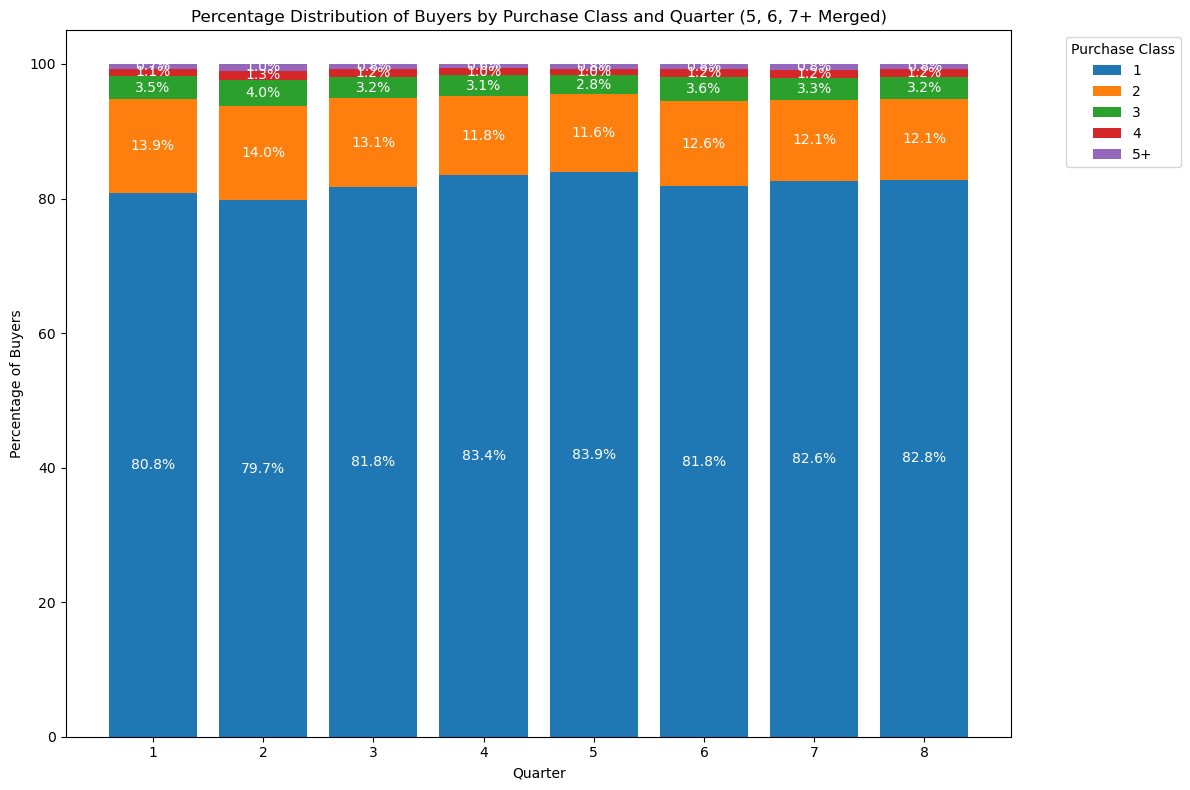

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Group transactions by household and quarter
customer_stats = df_mueller.groupby(['household', 'Quarter']).agg({
    'basket': 'nunique'
}).reset_index()
customer_stats.columns = ['Household', 'Quarter', 'Purchase_Frequency']

# Apply the purchase frequency classes
purchase_frequency_cutoff = 7  # Adjust as needed
bins = list(range(0, purchase_frequency_cutoff + 1)) + [float('inf')]
labels = [str(x) for x in range(purchase_frequency_cutoff)] + [f'{purchase_frequency_cutoff}+']
customer_stats['Purchase_Class'] = pd.cut(customer_stats['Purchase_Frequency'], bins=bins, right=False, labels=labels)

# Group by 'Quarter' and 'Purchase_Class' and count unique households
buyer_class_aggregated = customer_stats.groupby(['Quarter', 'Purchase_Class']).agg({
    'Household': 'nunique'
}).reset_index()

# Rename the columns for clarity
buyer_class_aggregated.columns = ['Quarter', 'Purchase_Class', 'Number_of_Buyers']

# Pivot the data to have purchase classes as rows and quarters as columns, fill missing with 0
pivoted_data = buyer_class_aggregated.pivot(index='Purchase_Class', columns='Quarter', values='Number_of_Buyers')
pivoted_data = pivoted_data.fillna(0).astype(int)

# Calculate total unique households for each quarter
all_customers = customer_stats.groupby('Quarter')['Household'].nunique()

# Calculate zero buyers per quarter and add them to the pivoted DataFrame
total_buyers_per_quarter = pivoted_data.sum()
zero_buyers_per_quarter = all_customers - total_buyers_per_quarter

# Merge purchase classes '5', '6', and '7+' into one category '5+'
merged_pivoted_data = pivoted_data.copy()
merged_pivoted_data.loc['5+'] = merged_pivoted_data.loc['5':'7+'].sum()
merged_pivoted_data = merged_pivoted_data.drop(index=['5', '6', '7+'])

# Convert the number of buyers to percentages by dividing by the total buyers for each quarter
merged_pivoted_data_percentage = merged_pivoted_data.div(merged_pivoted_data.sum(axis=0), axis=1) * 100

# Remove the row with zero buyers from the percentage DataFrame
if '0' in merged_pivoted_data_percentage.index:
    merged_pivoted_data_percentage = merged_pivoted_data_percentage.drop(index='0')

# Prepare the data for plotting
quarters = merged_pivoted_data_percentage.columns
purchase_classes = merged_pivoted_data_percentage.index

# Create the plot
plt.figure(figsize=(12, 8))

# Initialize bottom for stacking
bottoms = [0] * len(quarters)

# Plot each Purchase_Class as a stacked bar with percentage values
for purchase_class in purchase_classes:
    bar = plt.bar(
        quarters,
        merged_pivoted_data_percentage.loc[purchase_class],
        bottom=bottoms,
        label=purchase_class
    )
    
    # Add percentage labels to the bars
    for rect, percentage in zip(bar, merged_pivoted_data_percentage.loc[purchase_class]):
        height = rect.get_height()
        if height > 0:  # Only label non-zero bars
            plt.text(
                rect.get_x() + rect.get_width() / 2, 
                rect.get_y() + height / 2, 
                f'{percentage:.1f}%', 
                ha='center', va='center', color='white', fontsize=10
            )
    
    # Update bottoms for stacking
    bottoms = [bottom + height for bottom, height in zip(bottoms, merged_pivoted_data_percentage.loc[purchase_class])]

# Add labels and title
plt.title('Percentage Distribution of Buyers by Purchase Class and Quarter (5, 6, 7+ Merged)')
plt.xlabel('Quarter')
plt.ylabel('Percentage of Buyers')
plt.legend(title='Purchase Class', bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove grid lines
plt.grid(False)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

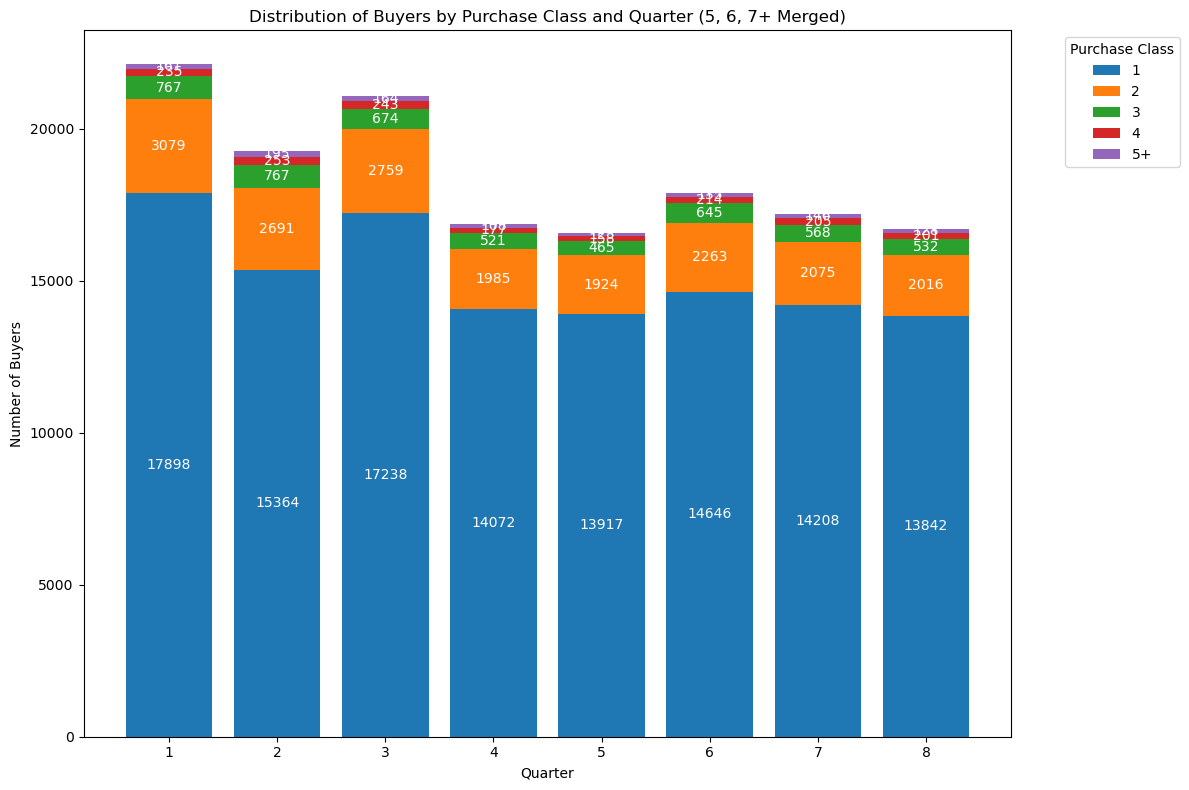

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# Group transactions by household and quarter
customer_stats = df_mueller.groupby(['household', 'Quarter']).agg({
    'basket': 'nunique'
}).reset_index()
customer_stats.columns = ['Household', 'Quarter', 'Purchase_Frequency']

# Apply the purchase frequency classes
purchase_frequency_cutoff = 7  # Adjust as needed
bins = list(range(0, purchase_frequency_cutoff + 1)) + [float('inf')]
labels = [str(x) for x in range(purchase_frequency_cutoff)] + [f'{purchase_frequency_cutoff}+']
customer_stats['Purchase_Class'] = pd.cut(customer_stats['Purchase_Frequency'], bins=bins, right=False, labels=labels)

# Group by 'Quarter' and 'Purchase_Class' and count unique households
buyer_class_aggregated = customer_stats.groupby(['Quarter', 'Purchase_Class']).agg({
    'Household': 'nunique'
}).reset_index()

# Rename the columns for clarity
buyer_class_aggregated.columns = ['Quarter', 'Purchase_Class', 'Number_of_Buyers']

# Pivot the data to have purchase classes as rows and quarters as columns, fill missing with 0
pivoted_data = buyer_class_aggregated.pivot(index='Purchase_Class', columns='Quarter', values='Number_of_Buyers')
pivoted_data = pivoted_data.fillna(0).astype(int)

# Assuming 'all_customers' is defined elsewhere and represents the total number of unique households in each quarter
# For demonstration, you can compute all_customers like this:
all_customers = customer_stats.groupby('Quarter')['Household'].nunique()

# Calculate zero buyers per quarter and add them to the pivoted DataFrame
total_buyers_per_quarter = pivoted_data.sum()
zero_buyers_per_quarter = all_customers - total_buyers_per_quarter
pivoted_data.loc['0'] = zero_buyers_per_quarter

# Exclude '0' buyers from the dataset
pivoted_data = pivoted_data.drop(index='0')

# Merge purchase classes '5', '6', and '7+' into one category '5+'
merged_pivoted_data = pivoted_data.copy()
merged_pivoted_data.loc['5+'] = merged_pivoted_data.loc['5':'7+'].sum()
merged_pivoted_data = merged_pivoted_data.drop(index=['5', '6', '7+'])

# Prepare the data for plotting
quarters = merged_pivoted_data.columns
purchase_classes = merged_pivoted_data.index

# Create the plot
plt.figure(figsize=(12, 8))

# Initialize bottom for stacking
bottoms = [0] * len(quarters)

# Plot each Purchase_Class as a stacked bar with exact numbers of buyers
for purchase_class in purchase_classes:
    bar = plt.bar(
        quarters,
        merged_pivoted_data.loc[purchase_class],
        bottom=bottoms,
        label=purchase_class
    )
    
    # Add exact number labels to the bars
    for rect, num_buyers in zip(bar, merged_pivoted_data.loc[purchase_class]):
        height = rect.get_height()
        if height > 0:  # Only label non-zero bars
            plt.text(
                rect.get_x() + rect.get_width() / 2, 
                rect.get_y() + height / 2, 
                f'{int(num_buyers)}',  # Display the exact number
                ha='center', va='center', color='white', fontsize=10
            )
    
    # Update bottoms for stacking
    bottoms = [bottom + height for bottom, height in zip(bottoms, merged_pivoted_data.loc[purchase_class])]

# Add labels and title
plt.title('Distribution of Buyers by Purchase Class and Quarter (5, 6, 7+ Merged)')
plt.xlabel('Quarter')
plt.ylabel('Number of Buyers')
plt.legend(title='Purchase Class', bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove grid lines
plt.grid(False)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

In [42]:
# Filter the data for Quarter 8
df_filtered = df[df['Quarter'] == 8]

# Display the filtered dataset
display(df_filtered)

,upc,product_description,commodity,brand,product_size,dollar_sales,units,week,household,basket,day,Week,FourWeek,Quarter,Year
84,1510000001,CRMET ELBW MACARONI SMALL,pasta,Creamette,7 OZ,0.42,1,100,275682,3171676,696,100,25,8,3
153,1510000001,CRMET ELBW MACARONI SMALL,pasta,Creamette,7 OZ,0.48,1,99,79163,3132158,687,99,25,8,3
154,1510000001,CRMET ELBW MACARONI SMALL,pasta,Creamette,7 OZ,0.48,1,97,34792,3087300,677,97,25,8,3
155,1510000001,CRMET ELBW MACARONI SMALL,pasta,Creamette,7 OZ,0.48,1,102,76974,3237392,711,102,26,8,3
156,1510000001,CRMET ELBW MACARONI SMALL,pasta,Creamette,7 OZ,0.48,1,100,279089,3183918,700,100,25,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325300,9999985766,PRIVATE LABEL ITALIAN TRI COLORE CRE,pasta,Private Label Premium,16 OZ,6.00,3,102,416340,3232248,710,102,26,8,3
2325306,9999985766,PRIVATE LABEL ITALIAN TRI COLORE CRE,pasta,Private Label Premium,16 OZ,7.96,4,103,75239,3251996,715,103,26,8,3
2325309,9999985766,PRIVATE LABEL ITALIAN TRI COLORE CRE,pasta,Private Label Premium,16 OZ,8.00,4,100,224679,3180195,698,100,25,8,3
2325317,9999985766,PRIVATE LABEL ITALIAN TRI COLORE CRE,pasta,Private Label Premium,16 OZ,9.95,5,92,459941,2938935,643,92,23,8,3


In [43]:
# Check for duplicates and missing values

print("Initial duplicate entries:", df_filtered.duplicated().sum())
missing_values = df_filtered.isnull().sum()
print("\nInitial missing values:\n")
print(missing_values[missing_values > 0])

Initial duplicate entries: 0

Initial missing values:

Series([], dtype: int64)


In [44]:
# Provide frequency counts for each categorical column

for column in df_filtered.select_dtypes(include='object').columns:
    print(f"\n{column} value counts:")
    print(df_filtered[column].value_counts())


product_description value counts:
product_description
PRIVATE LABEL THIN SPAGHETTI       22082
PRIVATE LABEL SPAGHETTI REGULAR    21069
PRIVATE LABEL ANGEL HAIR PASTA     11146
PRIVATE LABEL ELBOW MACARONI       10298
PRIVATE LABEL ELBO MACARONI         9205
                                   ...  
DE CECCO ROTELLO WHEEL 54              1
PASTA SHOP TAILGATE PASTA              1
DEL ALPE BASIL/GRLC LINQUINE           1
MOTHERS NO YLK WD EGG NOD              1
DEL ALPE LEM PEP LINGUINE              1
Name: count, Length: 302, dtype: int64

commodity value counts:
commodity
pasta    286341
Name: count, dtype: int64

brand value counts:
brand
Private Label            127877
Barilla                   37161
Ronzoni                   23452
Creamette                 22562
Mueller                   22309
Private Label Premium     21791
Barilla Plus               6660
No Yolks                   5293
Hodgson Mills              5163
San Giorgio                5065
Private Label Value        3453

In [57]:
def get_available_quarters(df):
    """Display available quarters in the dataset."""
    return df['Quarter'].unique()

def select_quarter(df):
    """Prompt the user to select a quarter from the available quarters."""
    available_quarters = get_available_quarters(df)
    print(f"Available Quarters: {available_quarters}")
    selected_quarter = int(input("Please select a Quarter: "))
    
    if selected_quarter not in available_quarters:
        raise ValueError(f"Selected Quarter {selected_quarter} is not available.")
        
    return selected_quarter

def select_household_threshold():
    """Prompt the user to input the threshold number of household buyers for the 'Other' category."""
    threshold = int(input("Please enter the household threshold below which brands will be aggregated into 'Other': "))
    return threshold

def calculate_brand_statistics(df, selected_quarter, household_threshold):
    """Calculate statistics for each brand, including 'All' and 'Other' categories."""
    # Filter the DataFrame for the selected quarter
    df_quarter = df[df['Quarter'] == selected_quarter]

    # Determine which brands are small based on the household threshold
    brand_household_count = df_quarter.groupby('brand')['household'].nunique()
    small_brands = brand_household_count[brand_household_count < household_threshold].index.tolist()

    # Create an empty DataFrame to store results
    results_df = pd.DataFrame()

    # Process each brand, omitting the small brands
    brand = df_quarter['brand'].unique()

    for brands in brand: 
        if brands in small_brands:
            continue  # Skip processing for small brands
        
        print(f"Processing brand: {brands}")
        
        # Filter the data for the current brand
        df_brand = df_quarter[df_quarter['brand'] == brands]
        
        # Calculate the required statistics for the brand
        quarterly_totals = df_brand.groupby('Quarter').agg(
            Total_Num_Customers=('household', 'nunique'),
            Total_Num_Baskets=('basket', 'nunique'),
            Total_Num_Stockcodes=('upc', 'nunique'),
            Total_Quantity=('units', 'sum'),
            Total_Revenue=('dollar_sales', 'sum')
        ).reset_index()
        
        # Add a column for the brand name
        quarterly_totals['brand'] = brands
        
        # Append the results to the results_df DataFrame
        results_df = pd.concat([results_df, quarterly_totals], ignore_index=True)

    # Calculate overall category statistics (All brands combined)
    overall_totals = df_quarter.groupby('Quarter').agg(
        Total_Num_Customers=('household', 'nunique'),
        Total_Num_Baskets=('basket', 'nunique'),
        Total_Num_Stockcodes=('upc', 'nunique'),
        Total_Quantity=('units', 'sum'),
        Total_Revenue=('dollar_sales', 'sum')
    ).reset_index()

    # Add a column for the brand, labeling it as 'All'
    overall_totals['brand'] = 'All'

    # Append the overall category results to the results_df DataFrame
    results_df = pd.concat([results_df, overall_totals], ignore_index=True)

    # Aggregate the small brands into an 'Other' category
    df_other = df_quarter[df_quarter['brand'].isin(small_brands)]
    other_totals = df_other.groupby('Quarter').agg(
        Total_Num_Customers=('household', 'nunique'),
        Total_Num_Baskets=('basket', 'nunique'),
        Total_Num_Stockcodes=('upc', 'nunique'),
        Total_Quantity=('units', 'sum'),
        Total_Revenue=('dollar_sales', 'sum')
    ).reset_index()

    # Label the 'Other' category
    other_totals['brand'] = 'Other'

    # Append the 'Other' category to the results_df DataFrame
    results_df = pd.concat([results_df, other_totals], ignore_index=True)

    return results_df

def save_to_csv(df, filename):
    """Save the DataFrame to a CSV file."""
    df.to_csv(filename, index=False)
    print(f"Results saved to {filename}")

# Example of how to use these functions
if __name__ == "__main__":

    # User input for quarter selection
    selected_quarter = select_quarter(df)

    # User input for household threshold
    household_threshold = select_household_threshold()

    # Calculate brand statistics
    results_df = calculate_brand_statistics(df, selected_quarter, household_threshold)

    # Save the results to a CSV file
    save_to_csv(results_df, 'brand_statistics_quarter_selected_with_overall_and_other.csv')
    
    # Establish the number of category buyers / customers

    all_customers = (df['household']).nunique()
    print("Total number of unique households buying: ", all_customers)

    # Display the first few rows of the results for confirmation
    display(results_df)

Available Quarters: [4 3 7 5 6 2 1 8]
Please select a Quarter: 8
Please enter the household threshold below which brands will be aggregated into 'Other': 3000
Processing brand: Creamette
Processing brand: Mueller
Processing brand: Ronzoni
Processing brand: San Giorgio
Processing brand: Hodgson Mills
Processing brand: No Yolks
Processing brand: Barilla
Processing brand: Barilla Plus
Processing brand: Private Label
Processing brand: Private Label Premium
Results saved to brand_statistics_quarter_selected_with_overall_and_other.csv
Total number of unique households buying:  411502


,Quarter,Total_Num_Customers,Total_Num_Baskets,Total_Num_Stockcodes,Total_Quantity,Total_Revenue,brand
0,8,16612,21341,19,26793,29796.56,Creamette
1,8,16719,21074,21,25830,30873.20,Mueller
2,8,16967,21224,31,27933,33934.60,Ronzoni
3,8,4288,4984,11,6083,8814.17,San Giorgio
4,8,3782,4827,10,5830,10962.30,Hodgson Mills
5,8,4397,5053,6,6493,7387.56,No Yolks
6,8,25179,32379,34,45359,53210.89,Barilla
7,8,4769,5825,6,7598,12639.29,Barilla Plus
8,8,75053,112835,29,174062,117459.12,Private Label
9,8,14880,18654,27,26324,26427.68,Private Label Premium


In [55]:
def calculate_brand_statistics(df, household_threshold=3000):
    """Calculate statistics for each brand, including 'All' and 'Other' categories."""
    # Create an empty DataFrame to store results
    results_df = pd.DataFrame()

    # Process each quarter
    for selected_quarter in df['Quarter'].unique():
        # Filter the DataFrame for the selected quarter
        df_quarter = df[df['Quarter'] == selected_quarter]

        # Determine which brands are small based on the household threshold
        brand_household_count = df_quarter.groupby('brand')['household'].nunique()
        small_brands = brand_household_count[brand_household_count < household_threshold].index.tolist()

        # Process each brand, omitting the small brands
        brands = df_quarter['brand'].unique()

        for brand in brands:
            if brand in small_brands:
                continue  # Skip processing for small brands

            print(f"Processing brand: {brand} for quarter: {selected_quarter}")

            # Filter the data for the current brand
            df_brand = df_quarter[df_quarter['brand'] == brand]

            # Calculate the required statistics for the brand
            quarterly_totals = df_brand.groupby('Quarter').agg(
                Total_Num_Customers=('household', 'nunique'),
                Total_Num_Baskets=('basket', 'nunique'),
                Total_Num_Stockcodes=('upc', 'nunique'),
                Total_Quantity=('units', 'sum'),
                Total_Revenue=('dollar_sales', 'sum')
            ).reset_index()

            # Add a column for the brand name
            quarterly_totals['brand'] = brand

            # Append the results to the results_df DataFrame
            results_df = pd.concat([results_df, quarterly_totals], ignore_index=True)

        # Calculate overall category statistics (All brands combined)
        overall_totals = df_quarter.groupby('Quarter').agg(
            Total_Num_Customers=('household', 'nunique'),
            Total_Num_Baskets=('basket', 'nunique'),
            Total_Num_Stockcodes=('upc', 'nunique'),
            Total_Quantity=('units', 'sum'),
            Total_Revenue=('dollar_sales', 'sum')
        ).reset_index()

        # Add a column for the brand, labeling it as 'All'
        overall_totals['brand'] = 'All'

        # Append the overall category results to the results_df DataFrame
        results_df = pd.concat([results_df, overall_totals], ignore_index=True)

        # Aggregate the small brands into an 'Other' category
        df_other = df_quarter[df_quarter['brand'].isin(small_brands)]
        other_totals = df_other.groupby('Quarter').agg(
            Total_Num_Customers=('household', 'nunique'),
            Total_Num_Baskets=('basket', 'nunique'),
            Total_Num_Stockcodes=('upc', 'nunique'),
            Total_Quantity=('units', 'sum'),
            Total_Revenue=('dollar_sales', 'sum')
        ).reset_index()

        # Label the 'Other' category
        other_totals['brand'] = 'Other'

        # Append the 'Other' category to the results_df DataFrame
        results_df = pd.concat([results_df, other_totals], ignore_index=True)

    return results_df

def save_to_csv(df, filename):
    """Save the DataFrame to a CSV file."""
    df.to_csv(filename, index=False)
    print(f"Results saved to {filename}")

# Example of how to use these functions
if __name__ == "__main__":
    # Calculate brand statistics for all quarters
    results_df = calculate_brand_statistics(df, household_threshold=3000)

    # Save the results to a CSV file
    save_to_csv(results_df, 'brand_statistics_all_quarters_with_overall_and_other.csv')

    # Establish the number of category buyers / customers
    all_customers = df['household'].nunique()
    print("Total number of unique households buying: ", all_customers)

    # Display the first few rows of the results for confirmation
    display(results_df)

Processing brand: Creamette for quarter: 4
Processing brand: Mueller for quarter: 4
Processing brand: Ronzoni for quarter: 4
Processing brand: San Giorgio for quarter: 4
Processing brand: Hodgson Mills for quarter: 4
Processing brand: No Yolks for quarter: 4
Processing brand: Barilla for quarter: 4
Processing brand: Private Label Value for quarter: 4
Processing brand: Private Label for quarter: 4
Processing brand: Private Label Premium for quarter: 4
Processing brand: Creamette for quarter: 3
Processing brand: Mueller for quarter: 3
Processing brand: Ronzoni for quarter: 3
Processing brand: San Giorgio for quarter: 3
Processing brand: Hodgson Mills for quarter: 3
Processing brand: No Yolks for quarter: 3
Processing brand: Barilla for quarter: 3
Processing brand: Private Label Value for quarter: 3
Processing brand: Private Label for quarter: 3
Processing brand: Private Label Premium for quarter: 3
Processing brand: Creamette for quarter: 7
Processing brand: Mueller for quarter: 7
Proces

,Quarter,Total_Num_Customers,Total_Num_Baskets,Total_Num_Stockcodes,Total_Quantity,Total_Revenue,brand
0,4,14362,17992,26,21903,25427.51,Creamette
1,4,16863,20941,25,25324,32567.47,Mueller
2,4,10321,12511,33,16766,20243.33,Ronzoni
3,4,5807,7077,24,8685,11607.97,San Giorgio
4,4,3437,4398,9,5345,9617.93,Hodgson Mills
...,...,...,...,...,...,...,...
89,8,4769,5825,6,7598,12639.29,Barilla Plus
90,8,75053,112835,29,174062,117459.12,Private Label
91,8,14880,18654,27,26324,26427.68,Private Label Premium
92,8,139204,239957,315,363025,349849.26,All
